<a href="https://colab.research.google.com/github/Welle-Kim/pytorch/blob/master/%5B1%5D_nn_Sequential_API%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# Step 1. 데이터 준비 

## Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
  * MNIST 데이터 셋 Download

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

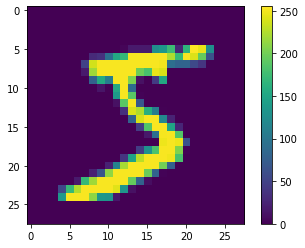

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

## Step 1-2. Input tensor 와 Target tensor 전처리

In [ ]:
# (60000, 28, 28) => (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

In [ ]:
print(train_images.shape)

(60000, 784)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
test_images = test_images.reshape((10000, 28*28))

In [ ]:
print(test_images.shape)

(10000, 784)


# Step 2. 모델에 데이터를 입력할 data pipeline 생성

In [ ]:
train_x = torch.Tensor(data=train_images)
train_y = torch.LongTensor(data=train_labels)

test_x = torch.Tensor(data=test_images)
test_y = torch.LongTensor(data=test_labels)

In [ ]:
train_x[0]

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [ ]:
train_x.shape

torch.Size([60000, 784])

In [ ]:
train_x.dtype

torch.float32

In [ ]:
train_y.shape

torch.Size([60000])

In [ ]:
train_y.dtype

torch.int64

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
train_dataset, validatioin_dataset = torch.utils.data.random_split(dataset=train_dataset,
                                                                   lengths=[50000, 10000])
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)

In [ ]:
x, y = next(iter(train_dataset))

In [ ]:
x.shape

torch.Size([784])

In [ ]:
batch_size = 64

In [ ]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validatioin_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
x, y = next(iter(train_loader))

In [ ]:
x.shape

torch.Size([64, 784])

In [ ]:
y

tensor([7, 8, 0, 7, 0, 0, 7, 5, 5, 4, 9, 0, 8, 1, 3, 2, 9, 7, 1, 7, 5, 2, 3, 7,
        8, 2, 2, 1, 5, 6, 3, 1, 7, 8, 5, 3, 0, 0, 1, 8, 3, 9, 4, 1, 7, 3, 0, 6,
        5, 8, 8, 1, 4, 8, 7, 8, 2, 2, 6, 3, 0, 7, 4, 6])

# Step 3. MLP 모델 정의

## Step 3-1. 모델 객체 정의

In [ ]:
model = torch.nn.Sequential()

In [ ]:
# 설명 코드
type(model)

torch.nn.modules.container.Sequential

In [ ]:
# 설명 코드
model

Sequential()

In [ ]:
model.append(module=torch.nn.Linear(in_features=784, out_features=256, bias=True))
model.append(module=torch.nn.ReLU())
model.append(module=torch.nn.Linear(in_features=256, out_features=10, bias=True))

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)

## Step 3-2. 학습을 위해 필요한 정보 설정

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

In [ ]:
# 설명 코드
for param in model.parameters():
  print(param.shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [ ]:
from torchsummary import summary

In [ ]:
summary(model=model,
        input_size=(1,784),
        batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [64, 1, 256]         200,960
              ReLU-2               [64, 1, 256]               0
            Linear-3                [64, 1, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.25
Params size (MB): 0.78
Estimated Total Size (MB): 1.22
----------------------------------------------------------------


In [ ]:
history = {
    'loss': [],
    'val_loss' : [],
    'acc': [],
    'val_acc' : []
}

## Step 4. 모델의 학습 loop 정의

In [ ]:
def train(epoch):
  model.train()

  train_loss = 0
  correct = 0
  
  for batch_idx,(data, target) in enumerate(train_loader):    
    # 모델의 순전파 수행
    output = model(data)
    
    # loss 함수에 모델의 예측값 과 정답 정보를 전달하여 loss 값 계산
    batch_loss = loss(output, target)

    # optimizer 초기화
    optimizer.zero_grad()
    
    # 모델을 구성하는 파라미터들(w, b)이 loss 에 미치는 영향도 계산
    batch_loss.backward()
    
    # 계산된 영향도(gradient) 값을 이용하여 파라미터(w,b) 업데이트
    optimizer.step()

    # 모델의 성능 모니터링을 위한 정보 계산 및 수집
    correct += (output.argmax(dim=1) == target).type(torch.float).sum().item()
    train_loss += batch_loss.item()

    if batch_idx%50 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
            epoch,
            (batch_idx+1) * len(data),
            len(train_loader.dataset),
            100. * (batch_idx+1) / len(train_loader),
            batch_loss.item(),
            100. * correct / ((batch_idx+1) * len(data))
            ))
    
  history['loss'].append(train_loss / len(train_loader))
  history['acc'].append(100. * correct / len(train_loader.dataset))

In [ ]:
def test(data_loader):
  model.eval()
  
  test_loss = 0
  correct = 0
  
  for data, target in data_loader:
    output = model(data)
    
    test_loss += loss(output, target).item()
    correct += (output.argmax(dim=1) == target).type(torch.float).sum().item()
    
  test_loss /= len(test_loader)
  accuracy = 100. * correct / len(validation_loader.dataset)
  
  print('\nTest set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(
        test_loss,
        accuracy))
  
  history['val_loss'].append(test_loss)
  history['val_acc'].append(accuracy)

In [ ]:
epochs = 30

In [ ]:
for epoch in range(1, epochs):
  train(epoch)
  test(validation_loader)

Train Epoch: 1 [64/50000 (0%)]	Loss: 35.177578	Accuracy: 9.38%
Train Epoch: 1 [3264/50000 (7%)]	Loss: 1.789542	Accuracy: 72.30%
Train Epoch: 1 [6464/50000 (13%)]	Loss: 0.394166	Accuracy: 79.32%
Train Epoch: 1 [9664/50000 (19%)]	Loss: 0.894793	Accuracy: 82.08%
Train Epoch: 1 [12864/50000 (26%)]	Loss: 0.520561	Accuracy: 83.68%
Train Epoch: 1 [16064/50000 (32%)]	Loss: 0.194152	Accuracy: 84.71%
Train Epoch: 1 [19264/50000 (38%)]	Loss: 0.591015	Accuracy: 85.63%
Train Epoch: 1 [22464/50000 (45%)]	Loss: 0.262228	Accuracy: 86.24%
Train Epoch: 1 [25664/50000 (51%)]	Loss: 0.248279	Accuracy: 86.78%
Train Epoch: 1 [28864/50000 (58%)]	Loss: 0.111745	Accuracy: 87.39%
Train Epoch: 1 [32064/50000 (64%)]	Loss: 0.428152	Accuracy: 87.79%
Train Epoch: 1 [35264/50000 (70%)]	Loss: 0.258263	Accuracy: 88.15%
Train Epoch: 1 [38464/50000 (77%)]	Loss: 0.321932	Accuracy: 88.43%
Train Epoch: 1 [41664/50000 (83%)]	Loss: 0.289560	Accuracy: 88.65%
Train Epoch: 1 [44864/50000 (90%)]	Loss: 0.211590	Accuracy: 88.91%
Tra

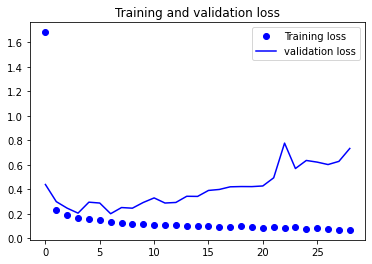

In [ ]:
epochs = range(len(history['loss']))

plt.plot(epochs, history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history['val_loss'], 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

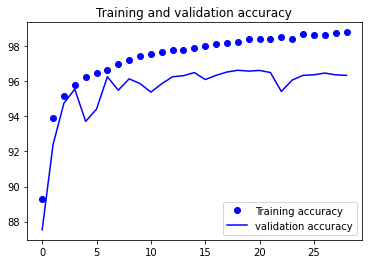

In [ ]:
plt.plot(epochs, history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, history['val_acc'], 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [ ]:
test(test_loader)


Test set: Average loss: 0.7111, Accuracy: 96%



In [ ]:
prediction = model(torch.Tensor(test_images[0]))

In [ ]:
prediction

tensor([-222.0856, -160.2808,  -73.0702,  -97.6194, -168.0302, -131.9401,
        -395.8897,   74.6896, -153.3245,  -87.7085], grad_fn=<AddBackward0>)

In [ ]:
prediction.argmax(axis=0)

tensor(7)

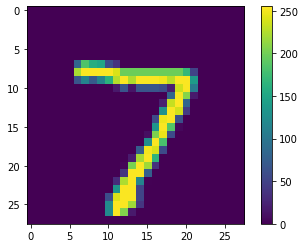

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

COPYRIGHT BY CODEPRESSO